   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

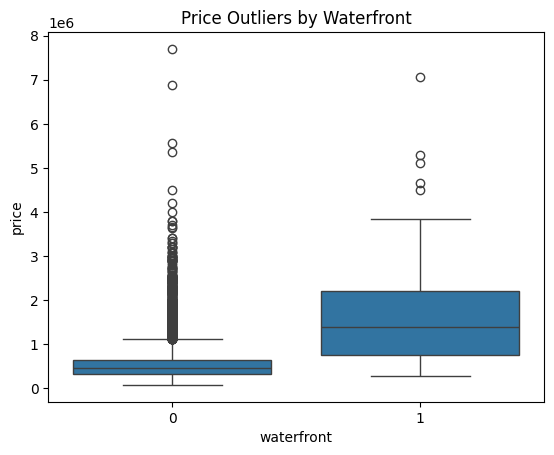

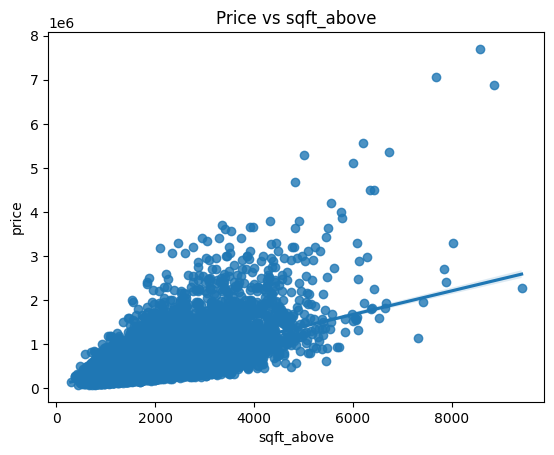

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64
R square:  0.4928532179037931
R square:  0.6576951666037498
R² score for pipeline: 0.7513408515988734
number of test samples: 3242
number of training samples: 18371
R² score Ridge without poly: 0.6576951534165585
R² Score on Test Data: 0.7002744252095244


In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#importing data from csv file
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath)
print(df.head())
print(df.dtypes)
#data wrangling
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)
print(df.describe())
#Explolatory Data Analysis
house_counts=df['floors'].value_counts().to_frame()
print(house_counts)
sns.boxplot(x='waterfront',y='price',data=df)
plt.title('Price Outliers by Waterfront')
plt.show()
sns.regplot(x='sqft_above',y='price',data=df)
plt.title('Price vs sqft_above')
plt.show()
df_numeric = df.select_dtypes(include=[np.number])
print(df_numeric.corr()['price'].sort_values())
#Model Development
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)
R2=lm.score(X,Y)
print("R square: ", R2)
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X=df[features]
Y=df[["price"]]
lm=LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)
R3=lm.score(X,Y)
print("R square: ",R3)
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
X=df[features]
Y=df["price"]
pipe=Pipeline(Input)
Y=Y.astype(float)
pipe.fit(X, Y)
ypipe = pipe.predict(X)
r2_pipe = pipe.score(X, Y)
print("R² score for pipeline:", r2_pipe)
#Model evaluation
X = df[features]
Y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
Ridgemodel=Ridge(alpha=0.1)
Ridgemodel.fit(X, Y)
print("R² score Ridge without poly:", Ridgemodel.score(X, Y))
pr=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = pr.fit_transform(x_train)
X_test_poly = pr.transform(x_test)
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)
y_pred = ridge.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
print(f"R² Score on Test Data: {r2}")